# Experimenting with the effect of maxPooling

In [1]:
%matplotlib inline

import torch
from torch import Tensor
import dlc_practical_prologue as prologue
from matplotlib import pyplot as plt
import time

from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

In [2]:
# Load MNIST dataset (reduced set)
train_input, train_target, test_input, test_target = \
    prologue.load_data(one_hot_labels = True, normalize = True, flatten = False)

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples


In [3]:
# Visualize dataset dimensions
print('train_input:',train_input.shape)
print('test_input:',test_input.shape)
print('train_target:',train_target.shape)
print('test_target:',test_target.shape)

train_input: torch.Size([1000, 1, 28, 28])
test_input: torch.Size([1000, 1, 28, 28])
train_target: torch.Size([1000, 10])
test_target: torch.Size([1000, 10])


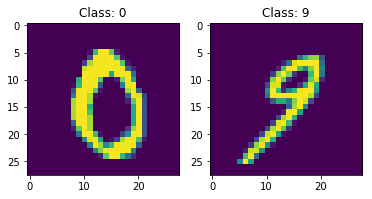

image size: torch.Size([28, 28])


In [4]:
# Dataset visualization
sample = 582
fig,axis = plt.subplots(1,2)
axis[0].imshow(train_input[sample,0])
axis[0].set_title('Class: {}'.format(torch.argmax(train_target[sample])))
axis[1].imshow(train_input[sample+1,0])
axis[1].set_title('Class: {}'.format(torch.argmax(train_target[sample+1])))
plt.show()
print('image size:',train_input[sample,0].shape)

In [5]:
# Professor example
class ProfessorNet(nn.Module):
    def __init__(self):
        super(ProfessorNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x

In [6]:
# Derived from professor's example, without maxPooling
class SimplifiedNet(nn.Module):
    def __init__(self):
        super(SimplifiedNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(64*20*20, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.fc1(x.view(-1, 64*20*20)))
        x = self.fc2(x)
        return x

In [7]:
# Function to train a model
def train_model(model, train_input, train_target, mini_batch_size):
    criterion = nn.MSELoss()
    eta = 1e-1
    for e in range(0, 25):
        sum_loss = 0
        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss = sum_loss + loss.item()
            model.zero_grad()
            loss.backward()
            for p in model.parameters():
                p.data.sub_(eta * p.grad.data)
        print(e, sum_loss)

In [8]:
# Evaluate the network's performance with winner takes it all approach
def compute_nb_errors(model, input_, target, mini_batch_size):
    error = 0
    for b in range(0, input_.size(0), mini_batch_size):
        output = model(input_.narrow(0, b, mini_batch_size))
        
        c_array = output.argmax(1)
        t_array = target[b:b+mini_batch_size].argmax(1)
        error += (c_array-t_array).nonzero().size()[0]
        
    return error/input_.size()[0]*100

In [9]:
# Train the professor's model and evaluate it
model = ProfessorNet() 
mini_batch_size = 100

train_model(model, train_input, train_target, mini_batch_size)
print('Loss on test set:', compute_nb_errors(model, test_input, test_target, mini_batch_size),'%')

0 0.9033293426036835
1 0.7755392491817474
2 0.6989829018712044
3 0.6369436867535114
4 0.5857527479529381
5 0.5477792881429195
6 0.5352983623743057
7 0.4928423687815666
8 0.4678100608289242
9 0.4578804410994053
10 0.41963087394833565
11 0.4123355597257614
12 0.3945891596376896
13 0.398359015583992
14 0.36867518350481987
15 0.3492415063083172
16 0.35235254652798176
17 0.3329454082995653
18 0.33431423269212246
19 0.3220176585018635
20 0.30278079584240913
21 0.30568417347967625
22 0.2838192079216242
23 0.2894000131636858
24 0.28004286997020245
Loss on test set: 15.299999999999999 %


In [10]:
# Train the simplified model and evaluate it
model = SimplifiedNet() 
mini_batch_size = 100

train_model(model, train_input, train_target, mini_batch_size)
print('Loss on test set:', compute_nb_errors(model, test_input, test_target, mini_batch_size),'%')

0 0.8435735255479813
1 0.6591185517609119
2 0.5006121657788754
3 0.4407782480120659
4 0.3672323301434517


KeyboardInterrupt: 

# Project 1
Load the dataset:

In [11]:
# Load the dataset
nb = 1000
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(nb)

In [12]:
# Display the data shape
print('train_input:',train_input.shape)
print('train_target:',train_target.shape)
print('train_classes:',train_classes.shape)
print('test_input:',test_input.shape)
print('test_target:',test_target.shape)
print('test_classes:',test_classes.shape)

train_input: torch.Size([1000, 2, 14, 14])
train_target: torch.Size([1000])
train_classes: torch.Size([1000, 2])
test_input: torch.Size([1000, 2, 14, 14])
test_target: torch.Size([1000])
test_classes: torch.Size([1000, 2])


## Visualise the dataset

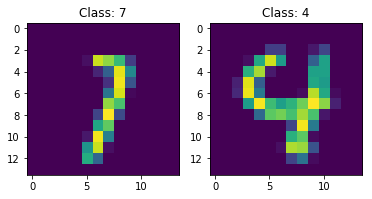

Expected classification:  0


In [13]:
# Dataset visualization
sample = 593
fig,axis = plt.subplots(1,2)
axis[0].imshow(train_input[sample,0])
axis[0].set_title('Class: {}'.format(train_classes[sample,0]))
axis[1].imshow(train_input[sample,1])
axis[1].set_title('Class: {}'.format(train_classes[sample,1]))
plt.show()
print('Expected classification: ',train_target[sample].item())

## Network Architecture
Define a module responsible for recognizing the classes and another that will identify if the first digit is less or equal to the second.

### Class identifier

In [14]:
# Define a Net that works with a single image (hence channel dim = 1)
class Parallel_Net(nn.Module):
    '''
        Building block used to classify the digit.

        Net input: Nx1x14x14 (single image)
        Net output: 10x1
    '''
    def __init__(self):
        super(Parallel_Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64*3*3, 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(self.conv2(x))
        x = F.relu(self.fc1(x.view(-1, 64*3*3)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

### Relation identifier

In [15]:
class Analyzer_Net(nn.Module):
    '''
        Building block used to infer digit's relation.

        Net input: 20x1 (digit classification)
        Net output: 1x1 (bigger or smaller)
    '''
    def __init__(self):
        super(Analyzer_Net, self).__init__()
        self.fc1 = nn.Linear(2*10, 15)
        self.fc2 = nn.Linear(15, 10)
        self.fc3 = nn.Linear(10, 5)
        self.fc4 = nn.Linear(5, 1) 
        
    def forward(self,x):
        '''x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)''' # torch.sigmoid() maybe?
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

## Build a Basic Network with only a MSE loss on the target

In [78]:
class BasicNet(nn.Module):
    '''
        Net caracteristics:
            - No weight sharing
            - No intermediate loss
        
        Net input: Nx2x14x14
        Net output: 2x1 
    '''
    def __init__(self):
        super(BasicNet, self).__init__()
        self.parallel_net1 = Parallel_Net()
        self.parallel_net2 = Parallel_Net()
        self.analyser_net  = Analyzer_Net()
    
    def forward(self,x):
        # Split the 2 input channels
        x1 = x[:,0,:,:].view(-1,1,14,14)
        x2 = x[:,1,:,:].view(-1,1,14,14)

        # No weight sharing (declare 2 distinct instances of Parallel_Net)
        x1 = self.parallel_net1(x1)
        x2 = self.parallel_net2(x2)

        # Concatenate back both classification results 
        x = torch.cat((x1.view(-1,10),x2.view(-1,10)),dim=1)
        x = self.analyser_net(x)

        return x 

### Train the network

In [79]:
def trainMSE(model, train_input, train_target, mini_batch_size):
    train_target = train_target.type(torch.FloatTensor)

    # Specify the loss function
    criterion = nn.MSELoss()

    # Define the number of epochs to train the network
    epochs = 25
    
    # Set the learning rate
    eta = 0.1

    for e in range(epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size)) # dim,start,length
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss = sum_loss + loss.item()
            model.zero_grad()
            loss.backward()
            for p in model.parameters():
                p.data.sub_(eta * p.grad.data)
        #return
        print('Sum of loss at epoch {}: \t'.format(e),sum_loss)
    
    return model

In [80]:
def evaluateFinalOutput(model,test_input, test_target,mini_batch_size):
    test_target = test_target.type(torch.FloatTensor)
    
    with torch.no_grad():
        error = 0
        for b in range(0, test_input.size(0), mini_batch_size):
            output = model(test_input.narrow(0, b, mini_batch_size))
            for i in range(output.size(0)):
                #print(output[i].item(),test_target.narrow(0, b, batch_size)[i].item())
                if output[i].item() >= 0.5:
                    if test_target.narrow(0, b, mini_batch_size)[i].item() < 0.2:
                        error += 1
                elif output[i].item() < 0.5:
                    if test_target.narrow(0, b, mini_batch_size)[i].item() > 0.8:
                        error += 1
                else:
                    error += 1
    return error/test_target.size(0)*100

In [81]:
# Define the mini_batch size
mini_batch_size = 200

# Create an instance of the network
basicModel = BasicNet()
num_param = sum(p.numel() for p in basicModel.parameters() if p.requires_grad)
print('Number of trainable parameters:',num_param)

Number of trainable parameters: 99352


In [82]:
# Train the network
basicModel = trainMSE(basicModel,train_input, train_target, mini_batch_size)

Sum of loss at epoch 0: 	 1.2532578706741333
Sum of loss at epoch 1: 	 1.2474425435066223
Sum of loss at epoch 2: 	 1.2454077452421188
Sum of loss at epoch 3: 	 1.24446801841259
Sum of loss at epoch 4: 	 1.2439560294151306
Sum of loss at epoch 5: 	 1.2436539232730865
Sum of loss at epoch 6: 	 1.2434634268283844
Sum of loss at epoch 7: 	 1.2433392256498337
Sum of loss at epoch 8: 	 1.2432561069726944
Sum of loss at epoch 9: 	 1.24319888651371
Sum of loss at epoch 10: 	 1.2431587278842926
Sum of loss at epoch 11: 	 1.243130087852478
Sum of loss at epoch 12: 	 1.243108868598938
Sum of loss at epoch 13: 	 1.2430929392576218
Sum of loss at epoch 14: 	 1.2430806457996368
Sum of loss at epoch 15: 	 1.243071049451828
Sum of loss at epoch 16: 	 1.243063360452652
Sum of loss at epoch 17: 	 1.243057206273079
Sum of loss at epoch 18: 	 1.243052139878273
Sum of loss at epoch 19: 	 1.2430478632450104
Sum of loss at epoch 20: 	 1.243044227361679
Sum of loss at epoch 21: 	 1.2430410087108612
Sum of lo

In [83]:
# Evaluate the performance of the model
res = evaluateFinalOutput(basicModel,test_input,test_target,mini_batch_size)
print('Error rate of the model: ',res,'%')

Error rate of the model:  44.3 %


## Add cross-entropy loss at the classification level

### Note: Distinction between `clone()` and `copy_()`
Both functions allow to create a clone of a Tensor instance. The difference is that using `clone()`, this function is recorded in the computation graph. Gradients propagating to the cloned tensor will propagate to the original tensor!
Therefore `copy_()` allows to fully separate the cloned tensor from its original version and makes it independent.

Check [the doc](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.clone) for more details (`copy_` is right below `clone`).

In [48]:
# TODO

## Train each submodule individually

### Train the Class Identifier

In [89]:
def trainClassIdentifier(model, train_input, train_classes, mini_batch_size):
    
    # Specify the loss function
    criterion = nn.CrossEntropyLoss()

    # Define the number of epochs to train the network
    epochs = 50
    
    # Set the learning rate
    eta = 0.01

    for e in range(epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            model.zero_grad()
            for i in range(2):
                # For each image (since there are 2 channels)
                output = model(train_input[:,i].view(-1,1,14,14).narrow(0, b, mini_batch_size)) # dim,start,length
                loss = criterion(output, train_classes[:,i].narrow(0, b, mini_batch_size))
                sum_loss += loss.item()
                loss.backward()
            for p in model.parameters():
                p.data.sub_(eta * p.grad.data)
        #return
        print('Sum of loss at epoch {}: \t'.format(e),sum_loss)
    
    return model

In [90]:
# Evaluate the network's performance with winner takes it all approach
def evaluateClassIdentification(model, test_input, test_classes, mini_batch_size):
    error = 0
    for b in range(0, test_input.size(0), mini_batch_size):
        output = model(test_input[:,0].view(-1,1,14,14).narrow(0, b, mini_batch_size))
        
        c_array = output.argmax(1)
        t_array = test_classes[:,0][b:b+mini_batch_size]
        error += (c_array-t_array).nonzero().size()[0]
        
    return error/test_input.size()[0]*100

In [91]:
# Define the mini_batch size
mini_batch_size = 200

# Instantiate the model
classModel = Parallel_Net()

In [92]:
classModel = trainClassIdentifier(classModel, train_input, train_classes, mini_batch_size)

Sum of loss at epoch 0: 	 31.49049735069275
Sum of loss at epoch 1: 	 20.087369918823242
Sum of loss at epoch 2: 	 17.723151803016663
Sum of loss at epoch 3: 	 14.297038674354553
Sum of loss at epoch 4: 	 13.88499540090561
Sum of loss at epoch 5: 	 9.506675243377686
Sum of loss at epoch 6: 	 9.820306718349457
Sum of loss at epoch 7: 	 6.737525641918182
Sum of loss at epoch 8: 	 6.035516083240509
Sum of loss at epoch 9: 	 5.872492611408234
Sum of loss at epoch 10: 	 4.430459260940552
Sum of loss at epoch 11: 	 4.175244510173798
Sum of loss at epoch 12: 	 4.4085473120212555
Sum of loss at epoch 13: 	 2.96647872030735
Sum of loss at epoch 14: 	 3.9429188072681427
Sum of loss at epoch 15: 	 2.5074550062417984
Sum of loss at epoch 16: 	 2.259713441133499
Sum of loss at epoch 17: 	 2.905395805835724
Sum of loss at epoch 18: 	 2.0890191048383713
Sum of loss at epoch 19: 	 1.6869547367095947
Sum of loss at epoch 20: 	 1.506991170346737
Sum of loss at epoch 21: 	 1.4606547206640244
Sum of loss 

In [93]:
# Evaluate the class identification of the model
res = evaluateClassIdentification(classModel, test_input, test_classes, mini_batch_size)
print('Error rate of the model: ',res,'%')

Error rate of the model:  6.3 %


### Train the Analyzer

In [54]:
def trainAnalyzer(model, train_classes, train_target, mini_batch_size):
    train_target = train_target.type(torch.FloatTensor)
    
    # Specify the loss function
    criterion = nn.MSELoss(reduction='mean')

    # Define the number of epochs to train the network
    epochs = 25
    
    # Set the learning rate
    eta = 1e-0
    optimizer = torch.optim.SGD(model.parameters(), lr = eta)
    
    # One hot encode the training classes and concatenate them (1000x2)->(1000x2x10)
    train_oneHot = torch.empty([train_classes.shape[0],2,10])
    train_oneHot[:,0] = torch.eye(10)[train_classes[:,0]]
    train_oneHot[:,1] = torch.eye(10)[train_classes[:,1]]
    # Convert to the format expected by the Analyzer (1000x20)
    train_oneHot_cat = torch.cat([train_oneHot[:,0],train_oneHot[:,1]],dim=1)

    for e in range(epochs):
        sum_loss = 0
        for b in range(0, train_oneHot_cat.size(0), mini_batch_size):
            model.zero_grad()
            output = model(train_oneHot_cat.narrow(0, b, mini_batch_size)) # dim,start,length
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss += loss.item()
            loss.backward()
            optimizer.step()
            '''for p in model.parameters():
                p.data.sub_(eta * p.grad.data)'''
        #return
        print('Sum of loss at epoch {}: \t'.format(e),sum_loss)
    
    return model

In [60]:
# Verifiy One Hot encoding and concatenation
train_oneHot = torch.empty([train_classes.shape[0],2,10])
train_oneHot[:,0] = torch.eye(10)[train_classes[:,0]]
train_oneHot[:,1] = torch.eye(10)[train_classes[:,1]]
train_oh_cat = torch.cat([train_oneHot[:,0],train_oneHot[:,1]],dim=1)
#print(train_oneHot[0:10,0])
#print(train_classes[0:10,0])
#print(train_oh_cat[0:10])
#print(train_classes[0:10,0],train_classes[0:10,1])

In [56]:
def evaluateAnalyzer(model,test_classes, test_target,mini_batch_size):
    test_target = test_target.type(torch.FloatTensor)
    
    # One hot encode the training classes and concatenate them (1000x2)->(1000x2x10)
    test_oneHot = torch.empty([test_classes.shape[0],2,10])
    test_oneHot[:,0] = torch.eye(10)[test_classes[:,0]]
    test_oneHot[:,1] = torch.eye(10)[test_classes[:,1]]
    # Convert to the format expected by the Analyzer (1000x20)
    test_oneHot_cat = torch.cat([test_oneHot[:,0],test_oneHot[:,1]],dim=1)
    
    with torch.no_grad():
        error = 0
        for b in range(0, test_oneHot_cat.size(0), mini_batch_size):
            output = model(test_oneHot_cat.narrow(0, b, mini_batch_size))
            
            '''samp = 143
            print(output[samp].item())
            print(test_target[b+samp].item())
            print(test_oneHot_cat.narrow(0, b, mini_batch_size)[samp])
            return'''
            
            for i in range(output.size(0)):
                #print(output[i].item(),test_target.narrow(0, b, batch_size)[i].item())
                if output[i].item() >= 0.5:
                    if test_target.narrow(0, b, mini_batch_size)[i].item() < 0.2:
                        error += 1
                elif output[i].item() < 0.5:
                    if test_target.narrow(0, b, mini_batch_size)[i].item() > 0.8:
                        error += 1
                else:
                    error += 1
    return error/test_target.size(0)*100

In [57]:
# Define the mini_batch size
mini_batch_size = 200

# Instantiate the model
analyzerModel = Analyzer_Net()

In [58]:
analyzerModel = trainAnalyzer(analyzerModel, train_classes, train_target, mini_batch_size)

Sum of loss at epoch 0: 	 1.2460974305868149
Sum of loss at epoch 1: 	 1.2443861663341522
Sum of loss at epoch 2: 	 1.2446050643920898
Sum of loss at epoch 3: 	 1.244727686047554
Sum of loss at epoch 4: 	 1.2447603642940521
Sum of loss at epoch 5: 	 1.244760051369667
Sum of loss at epoch 6: 	 1.2447492629289627
Sum of loss at epoch 7: 	 1.2447355687618256
Sum of loss at epoch 8: 	 1.2447212785482407
Sum of loss at epoch 9: 	 1.244707077741623
Sum of loss at epoch 10: 	 1.2446932047605515
Sum of loss at epoch 11: 	 1.244679719209671
Sum of loss at epoch 12: 	 1.2446666061878204
Sum of loss at epoch 13: 	 1.2446539103984833
Sum of loss at epoch 14: 	 1.2446415573358536
Sum of loss at epoch 15: 	 1.2446295022964478
Sum of loss at epoch 16: 	 1.2446178048849106
Sum of loss at epoch 17: 	 1.2446064352989197
Sum of loss at epoch 18: 	 1.244595393538475
Sum of loss at epoch 19: 	 1.2445846199989319
Sum of loss at epoch 20: 	 1.2445740848779678
Sum of loss at epoch 21: 	 1.2445638477802277
Sum

In [59]:
# Evaluate the relation prediction between the digit of the model
res = evaluateAnalyzer(analyzerModel,test_classes,test_target,mini_batch_size)
print('Error rate of the model: ',res,'%')

Error rate of the model:  44.3 %
